Old Yeller Text Analysis (In total takes about a minute or two to load all sections{previous draft was over 5 minutes})*Remember to upload the downloaded Old Yeller from GitHub to the import section*

In [ ]:
!pip install pypdf transformers torch --quiet
from pypdf import PdfReader
import re
import matplotlib.pyplot as plt
from transformers import pipeline
from google.colab import files

# Prompts user to insert downlaoded Old Yeller text file, found at GitHub
print("Upload your 'Old Yeller.pdf' file:")
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]
print(f"Uploaded file: {pdf_path}")

# Read PDF
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    page_text = page.extract_text()
    if page_text:
        text += page_text + "\n"

print("Extracted characters:", len(text))

# Split into chapters
chapter_names = [
    "ONE","TWO","THREE","FOUR","FIVE","SIX","SEVEN","EIGHT",
    "NINE","TEN","ELEVEN","TWELVE","THIRTEEN","FOURTEEN",
    "FIFTEEN","SIXTEEN"
]
pattern = r"\n(" + "|".join(chapter_names) + r")\s*\n"
splits = re.split(pattern, text)

chapters = {}
for i in range(1, len(splits), 2):
    title = splits[i]
    content = splits[i+1]
    chapters[title] = content.strip()

print("Chapters found:", len(chapters))

sentiment = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    device=-1  # CPU
)

Upload your 'Old Yeller.pdf' file:


Saving Old Yeller.pdf to Old Yeller (1).pdf
Uploaded file: Old Yeller (1).pdf
Extracted characters: 186079
Chapters found: 16


Device set to use cpu


In [ ]:
# Section 1: Chapter Sentiment
chapter_sentiments = {}

for title, content in chapters.items():
    result = sentiment(content, truncation=True, max_length=512)[0]

    # Convert POSITIVE → +score, NEGATIVE → -score
    score = result["score"] if result["label"] == "POSITIVE" else -result["score"]
    chapter_sentiments[title] = score

# Average book sentiment
average_book_sentiment = sum(chapter_sentiments.values()) / len(chapter_sentiments)
print("\nAverage Book Sentiment:", round(average_book_sentiment, 3))


Average Book Sentiment: -0.987


In [ ]:
# Section 2: Character Sentiment
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize

characters = ["Old Yeller", "Travis", "Arliss", "Mama", "Papa"]
character_sentiments = {}

sentences = sent_tokenize(text)

for char in characters:
    scores = []

    for s in sentences:
        if char in s:
            result = sentiment(s, truncation=True, max_length=512)[0]
            score = result["score"] if result["label"] == "POSITIVE" else -result["score"]
            scores.append(score)

    character_sentiments[char] = sum(scores)/len(scores) if scores else None

print("\nCharacter Sentiments:")
for char, score in character_sentiments.items():
    print(f"{char}: {round(score,3) if score is not None else 'not mentioned'}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Character Sentiments:
Old Yeller: -0.124
Travis: -0.23
Arliss: -0.108
Mama: -0.376
Papa: -0.284


In [ ]:
# Section 3: Plot Point Sentiment
plot_points = {
    "bear attack": r"bear|bear fight|bear encounter",
    "disease": r"rabies|illness|sick",
    "Old Yeller saves": r"Old Yeller saved|he saved|rescued",
    "Old Yeller dies": r"Old Yeller (was )?shot|put down|died",
    "hunting": r"hunt|hunting|hog hunt"
}

plot_sentiments = {}

for point, pattern in plot_points.items():
    scores = []
    for chunk in char_chunks:
        if re.search(pattern, chunk, re.IGNORECASE):
            result = sentiment(chunk, truncation=True, max_length=512)[0]
            score = result["score"] if result["label"] == "POSITIVE" else -result["score"]
            scores.append(score)
    plot_sentiments[point] = sum(scores)/len(scores) if scores else None

print("\nPlot Point Sentiments:")
for point, score in plot_sentiments.items():
    print(f"{point}: {round(score,3) if score is not None else 'not found'}")


Plot Point Sentiments:
bear attack: -0.526
disease: -0.858
Old Yeller saves: -0.985
Old Yeller dies: -0.307
hunting: -0.58


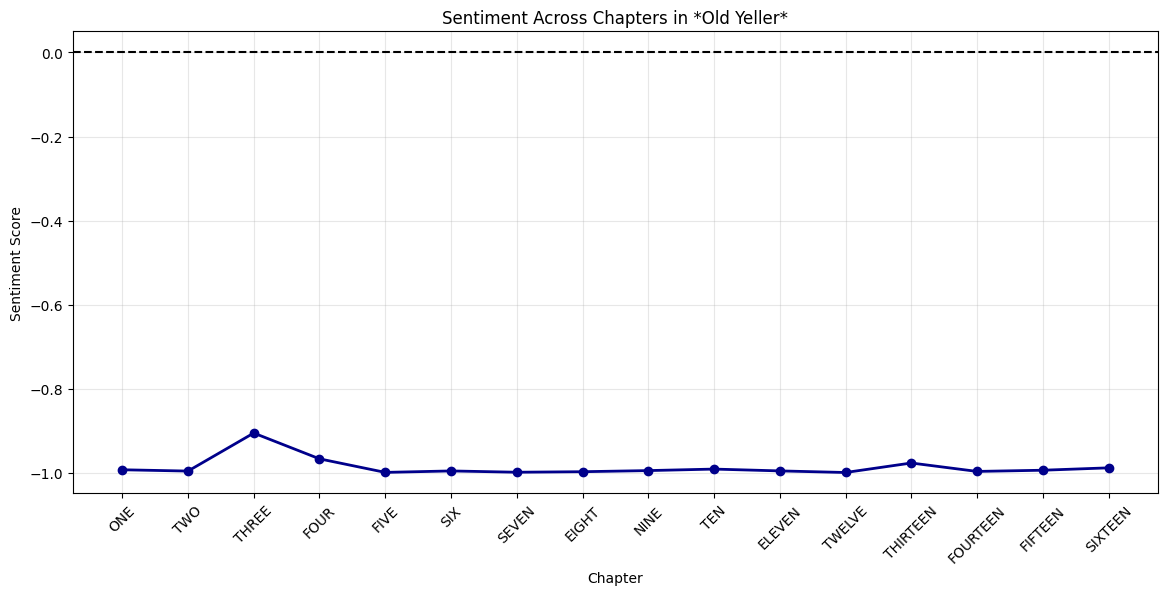

In [ ]:
# Section 4: Plot Chapter Sentiment
ordered = chapter_names
values = [chapter_sentiments[c] for c in ordered]
plt.figure(figsize=(14,6))
plt.plot(range(1, len(values)+1), values, marker="o", linewidth=2, color="darkblue")
plt.axhline(0, color='black', linestyle='--')
plt.xticks(range(1, len(values)+1), ordered, rotation=45)
plt.xlabel("Chapter")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Across Chapters in *Old Yeller*")
plt.grid(True, alpha=0.3)
plt.show()

Brief Interpretation: The sentiment is increfibly negative throughout the novel, which makes sense considering it is a sad book. No chapter, person, or event has a positive sentiment. Chapter 3 has the most positive sentiment. The events are very negative, while the characters are still negative, but they are closer to neutral than any other part, with Arliss having the closest sentiment to 0.